## Exercício de tratamento de dados
---
Os dados devem estar nesses padrões:

* __Aparência__
    * sol, nublado, chuva
* __Temperatura__
    * -130 ~ 130F
* __Umidade__
    * 0 ~ 100 
* __Jogar__
    * sim/não
* __Tratar__
    * valores NaN
---

#### Imports

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts
import warnings
warnings.filterwarnings('ignore')

#### Importando dados

In [3]:
dataset = pd.read_csv('..\..\data\Tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


#### Explorando dados categóricos aparência

In [4]:
grouping = dataset.groupby(['Aparencia']).size()
grouping

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

#### Verificando se existe algum NaN em aparência

In [5]:
dataset['Aparencia'].isnull().sum()

0

#### Substituindo 'menos' por 'sol'

In [6]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

#### Revendo dados atualidados aparência

In [7]:
grouping = dataset.groupby(['Aparencia']).size()
grouping

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<AxesSubplot: xlabel='Aparencia'>

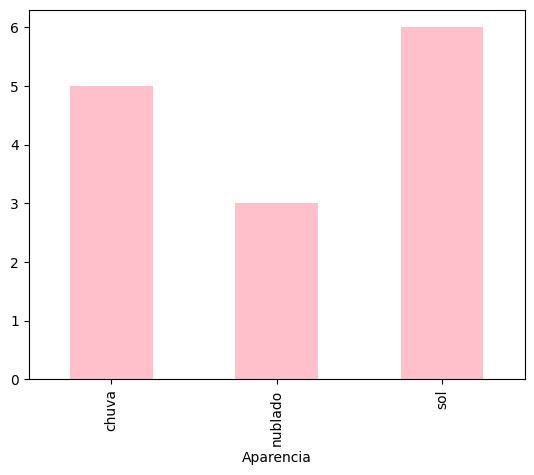

In [8]:
grouping.plot.bar(color='pink')

#### Explorando dados categóricos temperatura

In [9]:
grouping = dataset.groupby(['Temperatura']).sum()
grouping

,Umidade
Temperatura,
64,65.0
65,70.0
68,80.0
69,70.0
70,0.0
71,91.0
72,90.0
75,270.0
80,90.0


#### Verificando se existe algum NaN

In [10]:
dataset['Temperatura'].isnull().sum()

0

Text(0.5, 1.0, 'Temperaruta')

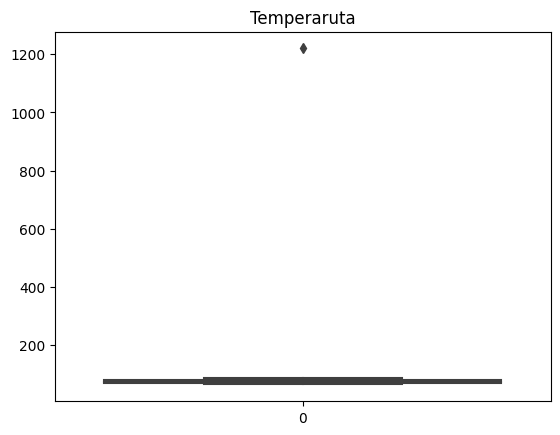

In [11]:
srn.boxplot(dataset['Temperatura']).set_title('Temperaruta')

Text(0.5, 1.0, 'Temperaruta')

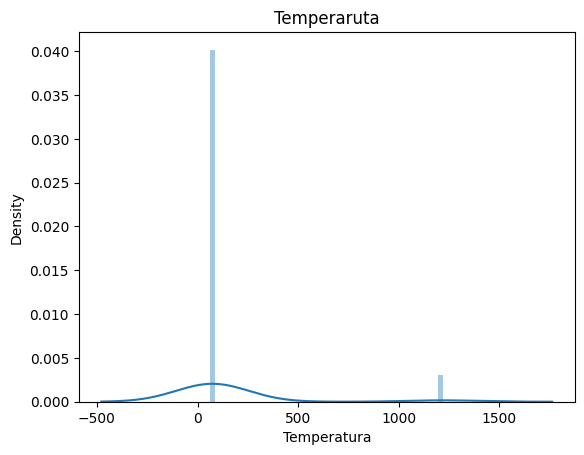

In [12]:
srn.distplot(dataset['Temperatura']).set_title('Temperaruta')

#### Verificando temperaturas fora do domínio

In [13]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


#### Calculando a mediana

In [14]:
median = sts.median(dataset['Temperatura'])
median

73.5

#### Substituindo valores fora do domínio pela mediana (73.5)

In [15]:
dataset.loc[(dataset['Temperatura'] > - 130) | (dataset['Temperatura'] > 130), 'Temperatura'] = median

#### Verificando valores novamente

In [16]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


#### Explorando dados categóricos umidade

In [17]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [18]:
grouping = dataset.groupby(['Umidade']).sum()
grouping

,Temperatura
Umidade,
65.0,73.5
70.0,220.5
75.0,73.5
80.0,73.5
85.0,73.5
86.0,73.5
90.0,147.0
91.0,73.5
95.0,73.5


Text(0.5, 1.0, 'Umidade')

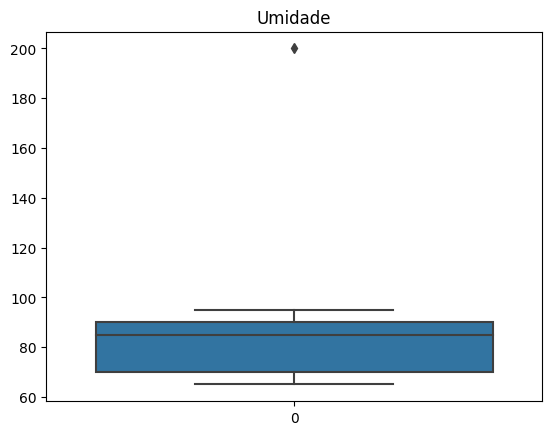

In [19]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

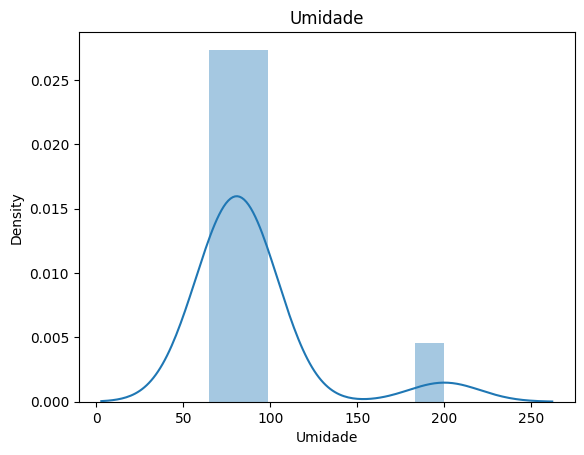

In [20]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

#### Verificando se existem NaN

In [21]:
dataset['Umidade'].isnull().sum()

1

#### Verificando valores fora do domínio umidade

In [22]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,73.5,200.0,NaN,sim


#### Calculando mediana umidade

In [23]:
median = sts.median(dataset['Umidade'])
median

85.5

#### Substituindo valores fora do domínio pela mediada (85.5)

Valores NaN

In [24]:
dataset['Umidade'].fillna(median, inplace=True)

Valores fora domínio

In [25]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = median

#### Verificando valores novamente

In [26]:
dataset['Umidade'].isnull().sum()

0

In [27]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


#### Explorando dados categóricos jogar

In [28]:
dataset['Jogar'].describe()

count      14
unique      2
top       sim
freq        9
Name: Jogar, dtype: object

#### Verificando se existem NaN

In [31]:
dataset['Jogar'].isnull().sum()

0

In [34]:
grouping = dataset.groupby(['Jogar']).sum()
grouping

,Temperatura,Umidade
Jogar,,
nao,367.5,431.0
sim,661.5,707.0


#### Explorando dados categóricos vento

In [35]:
dataset['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

#### Verificando se existem NaN

In [37]:
dataset['Vento'].isnull().sum()

1

#### Substituindo valores NaN pela moda (FALSO)

In [38]:
dataset['Vento'].fillna('FALSO', inplace=True)

#### Verificando se existem NaN novamente

In [39]:
dataset['Vento'].isnull().sum()

0

In [40]:
grouping = dataset.groupby(['Vento']).sum()
grouping

,Temperatura,Umidade
Vento,,
FALSO,588.0,662.0
VERDADEIRO,441.0,476.0
